In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%store -r data
%store -r data_test

In [3]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(11016, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     11016 non-null  datetime64[ns]
 1   Normal (kWh)             11016 non-null  float64       
 2   Horário Económico (kWh)  11016 non-null  float64       
 3   Autoconsumo (kWh)        11016 non-null  float64       
 4   Injeção na rede (kWh)    11016 non-null  int64         
 5   dt                       11016 non-null  int64         
 6   city_name                11016 non-null  object        
 7   

In [4]:
print(data_test.columns)
print(data_test.shape)
print(data_test.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(2256, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   Injeção na rede (kWh)    0 non-null      float64       
 5   dt                       2256 non-null   int64         
 6   city_name                2256 non-null   object        
 7   tem

In [5]:
data_dt   = data.copy()
data_dt_test = data_test.copy()
rem = ['dt','pressure','wind_speed','Mes','Hora','city_name','Data','rain_1h','clouds_all'] 
data_dt.drop(rem,axis=1,inplace=True)
data_dt_test.drop(rem ,axis=1,inplace=True)
nulls = False
def interpolate_linear(data_dt_test):
    data_dt_test['temp']                = data_dt_test['temp'].interpolate(method='linear')
    data_dt_test['feels_like']          = data_dt_test['feels_like'].interpolate(method='linear')
    data_dt_test['temp_min']            = data_dt_test['temp_min'].interpolate(method='linear')
    data_dt_test['temp_max']            = data_dt_test['temp_max'].interpolate(method='linear')
    data_dt_test['humidity']            = data_dt_test['humidity'].interpolate(method='linear')
    # data_dt_test['clouds_all']          = data_dt_test['clouds_all'].fillna(0)
    data_dt_test['weather_description'] = data_dt_test['weather_description'].interpolate(method='linear')

if nulls:
    interpolate_linear(data_dt_test)
data_dt.info()
data_dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   humidity                 11016 non-null  int64  
 9   weather_description      11016 non-null  int64  
 10  Estacao                  11016 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 946.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 11 columns):
 #   Column                   

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_dt.drop(['Injeção na rede (kWh)'],axis=1)
y = data_dt['Injeção na rede (kWh)'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=random)


In [7]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (11016, 10). X_train has shape (8262, 10) while X_test has shape (2754, 10)
The shape of y (11016, 1). y_train has shape (8262, 1) while y_test has shape (2754, 1)


C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


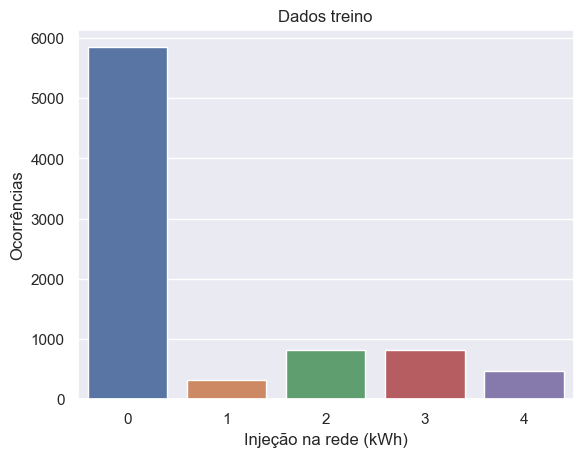

C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


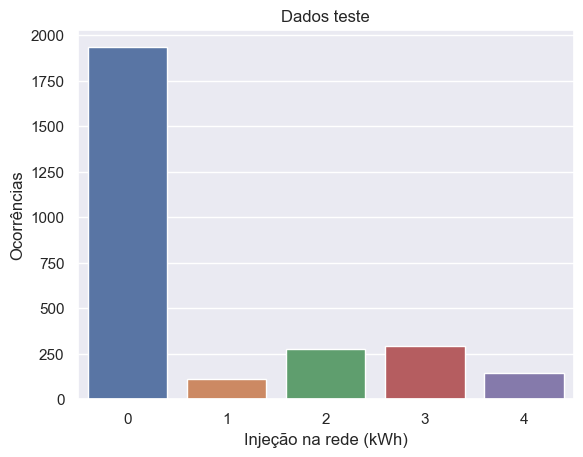

In [8]:
grafico_barras(y_train,'Injeção na rede (kWh)','Dados treino','Injeção na rede (kWh)','Ocorrências')
grafico_barras(y_test,'Injeção na rede (kWh)','Dados teste','Injeção na rede (kWh)','Ocorrências')

In [9]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import metrics
from scikeras.wrappers import KerasClassifier

In [11]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.1


In [12]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(32, input_dim=10, activation=activation))
    model.add(Dense(16, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(5, activation='softmax'))  # Adjusted for 5 classes
    
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.optimizers.Adam(learning_rate),
        metrics=['accuracy']
    )
    return model


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = pd.DataFrame(scaler_x.transform(X[X.columns]), columns = X.columns)

In [14]:
X.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,humidity,weather_description,Estacao
0,0.0,0.0,0.0,13.97,13.54,11.45,14.04,81,4,3
1,0.0,0.0,0.0,13.48,13.02,13.43,13.90,82,4,3
2,0.0,0.0,0.0,12.93,12.47,12.72,13.43,84,4,3
3,0.0,0.0,0.0,12.61,12.15,10.34,12.93,85,4,3
4,0.0,0.0,0.0,12.61,12.17,9.79,12.93,86,4,3


In [15]:
X_scaled.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,humidity,weather_description,Estacao
0,0.0,0.0,0.0,0.336788,0.361443,0.323608,0.316800,0.765432,0.428571,0.666667
1,0.0,0.0,0.0,0.324698,0.349494,0.376606,0.313310,0.777778,0.428571,0.666667
2,0.0,0.0,0.0,0.311128,0.336857,0.357602,0.301595,0.802469,0.428571,0.666667
3,0.0,0.0,0.0,0.303232,0.329504,0.293897,0.289133,0.814815,0.428571,0.666667
4,0.0,0.0,0.0,0.303232,0.329963,0.279176,0.289133,0.827160,0.428571,0.666667


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=2021)
print(y_train.value_counts())
print(y_test.value_counts())

Injeção na rede (kWh)
0                        5844
2                         822
3                         811
4                         463
1                         322
Name: count, dtype: int64
Injeção na rede (kWh)
0                        1933
3                         292
2                         276
4                         143
1                         110
Name: count, dtype: int64


In [17]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

In [18]:
kf = KFold(n_splits =10, shuffle = True, random_state = 2021)

In [19]:
build_model = build_model()
model = KerasClassifier(model = build_model, batch_size = 40, validation_split = 0.2, epochs = 20, random_state=2021)

In [20]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'accuracy',refit = 'True', verbose = 1,error_score='raise',)
grid_search.fit(X_train,y_train)

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp0cd6zro1\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp0cd6zro1\assets


Fitting 10 folds for each of 3 candidates, totalling 30 fits


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpsm4cjwuj\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpsm4cjwuj\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.7062 - accuracy: 0.8588 - val_loss: 0.4513 - val_accuracy: 0.7108
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.7192 - val_loss: 0.4089 - val_accuracy: 0.7196
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.7122 - val_loss: 0.4307 - val_accuracy: 0.7485
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.7147 - val_loss: 0.4204 - val_accuracy: 0.7034
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.7199 - val_loss: 0.3867 - val_accuracy: 0.7196
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.7224 - val_loss: 0.3735 - val_accuracy: 0.7223
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.7211 - val_loss: 0.3881 - val_accuracy: 0.7357
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpsp9mvsgn\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpsp9mvsgn\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.7199 - accuracy: 0.8418 - val_loss: 0.4612 - val_accuracy: 0.7411
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7236 - val_loss: 0.4368 - val_accuracy: 0.7182
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7206 - val_loss: 0.4215 - val_accuracy: 0.7054
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7209 - val_loss: 0.3965 - val_accuracy: 0.7290
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.7218 - val_loss: 0.3846 - val_accuracy: 0.7297
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.7228 - val_loss: 0.3769 - val_accuracy: 0.7337
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.7234 - val_loss: 0.3894 - val_accuracy: 0.7095
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp7k6eu48v\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp7k6eu48v\assets


Epoch 1/20
149/149 [==============================] - 1s 3ms/step - loss: 0.6856 - accuracy: 0.8132 - val_loss: 0.4490 - val_accuracy: 0.7157
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7182 - val_loss: 0.4757 - val_accuracy: 0.6841
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.7199 - val_loss: 0.4108 - val_accuracy: 0.7050
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.7182 - val_loss: 0.3890 - val_accuracy: 0.7392
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.7223 - val_loss: 0.3847 - val_accuracy: 0.7426
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.7226 - val_loss: 0.3758 - val_accuracy: 0.7292
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.7199 - val_loss: 0.3747 - val_accuracy: 0.7198
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpaiw0ljvz\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpaiw0ljvz\assets


Epoch 1/20
149/149 [==============================] - 1s 3ms/step - loss: 0.6805 - accuracy: 0.8267 - val_loss: 0.4522 - val_accuracy: 0.7063
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.7194 - val_loss: 0.4159 - val_accuracy: 0.7278
Epoch 3/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.7223 - val_loss: 0.4129 - val_accuracy: 0.7305
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.7202 - val_loss: 0.3933 - val_accuracy: 0.7144
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.7204 - val_loss: 0.4210 - val_accuracy: 0.7325
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.7214 - val_loss: 0.3917 - val_accuracy: 0.7124
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.7204 - val_loss: 0.4094 - val_accuracy: 0.7426
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpodmyz6p5\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpodmyz6p5\assets


Epoch 1/20
149/149 [==============================] - 1s 3ms/step - loss: 0.7042 - accuracy: 0.8512 - val_loss: 0.4438 - val_accuracy: 0.7419
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.7276 - val_loss: 0.4373 - val_accuracy: 0.6915
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.7234 - val_loss: 0.3852 - val_accuracy: 0.7184
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.7231 - val_loss: 0.3948 - val_accuracy: 0.6949
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.7211 - val_loss: 0.4092 - val_accuracy: 0.7433
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.7228 - val_loss: 0.3811 - val_accuracy: 0.7399
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.7241 - val_loss: 0.3688 - val_accuracy: 0.7339
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmppdoba4uq\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmppdoba4uq\assets


Epoch 1/20
149/149 [==============================] - 1s 3ms/step - loss: 0.7290 - accuracy: 0.8416 - val_loss: 0.4562 - val_accuracy: 0.7372
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.7280 - val_loss: 0.4164 - val_accuracy: 0.7130
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.7238 - val_loss: 0.4107 - val_accuracy: 0.7083
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.7196 - val_loss: 0.3985 - val_accuracy: 0.7164
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.7187 - val_loss: 0.4046 - val_accuracy: 0.7352
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.7204 - val_loss: 0.3832 - val_accuracy: 0.7191
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.7191 - val_loss: 0.3809 - val_accuracy: 0.7211
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpfz5psblv\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpfz5psblv\assets


Epoch 1/20
149/149 [==============================] - 1s 3ms/step - loss: 0.7121 - accuracy: 0.8433 - val_loss: 0.4765 - val_accuracy: 0.6875
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7248 - val_loss: 0.4142 - val_accuracy: 0.7137
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.7187 - val_loss: 0.3994 - val_accuracy: 0.7204
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.7196 - val_loss: 0.3848 - val_accuracy: 0.7157
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.7233 - val_loss: 0.3746 - val_accuracy: 0.7245
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.7214 - val_loss: 0.3793 - val_accuracy: 0.7265
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.7216 - val_loss: 0.3799 - val_accuracy: 0.7372
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpp0mvises\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpp0mvises\assets


Epoch 1/20
149/149 [==============================] - 1s 3ms/step - loss: 0.7514 - accuracy: 0.8541 - val_loss: 0.4552 - val_accuracy: 0.7480
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.7281 - val_loss: 0.4235 - val_accuracy: 0.7198
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.7221 - val_loss: 0.4004 - val_accuracy: 0.6875
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.7165 - val_loss: 0.3836 - val_accuracy: 0.7251
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.7204 - val_loss: 0.3997 - val_accuracy: 0.6996
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.7213 - val_loss: 0.3700 - val_accuracy: 0.7231
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.7213 - val_loss: 0.3902 - val_accuracy: 0.7292
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpx08dr4_s\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpx08dr4_s\assets


Epoch 1/20
149/149 [==============================] - 1s 3ms/step - loss: 0.6917 - accuracy: 0.8329 - val_loss: 0.4345 - val_accuracy: 0.7292
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7154 - val_loss: 0.4678 - val_accuracy: 0.6868
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.7189 - val_loss: 0.3845 - val_accuracy: 0.7258
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.7213 - val_loss: 0.3858 - val_accuracy: 0.7305
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.7184 - val_loss: 0.3858 - val_accuracy: 0.7164
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.7211 - val_loss: 0.3768 - val_accuracy: 0.7399
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.7211 - val_loss: 0.3735 - val_accuracy: 0.7520
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpxcuf4w2c\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpxcuf4w2c\assets


Epoch 1/20
149/149 [==============================] - 1s 3ms/step - loss: 0.7010 - accuracy: 0.8314 - val_loss: 0.4521 - val_accuracy: 0.7218
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7214 - val_loss: 0.4304 - val_accuracy: 0.7030
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.7176 - val_loss: 0.3994 - val_accuracy: 0.7298
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.7213 - val_loss: 0.3884 - val_accuracy: 0.7097
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.7174 - val_loss: 0.4076 - val_accuracy: 0.7392
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.7201 - val_loss: 0.3884 - val_accuracy: 0.7332
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.7224 - val_loss: 0.4031 - val_accuracy: 0.6888
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmplyv6j3vv\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmplyv6j3vv\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.7062 - accuracy: 0.8588 - val_loss: 0.4513 - val_accuracy: 0.7108
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.7192 - val_loss: 0.4089 - val_accuracy: 0.7196
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.7122 - val_loss: 0.4307 - val_accuracy: 0.7485
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.7147 - val_loss: 0.4204 - val_accuracy: 0.7034
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.7199 - val_loss: 0.3867 - val_accuracy: 0.7196
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.7224 - val_loss: 0.3735 - val_accuracy: 0.7223
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.7211 - val_loss: 0.3881 - val_accuracy: 0.7357
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp7yx83ih2\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp7yx83ih2\assets


Epoch 1/20
149/149 [==============================] - 1s 3ms/step - loss: 0.7199 - accuracy: 0.8418 - val_loss: 0.4612 - val_accuracy: 0.7411
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7236 - val_loss: 0.4368 - val_accuracy: 0.7182
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7206 - val_loss: 0.4215 - val_accuracy: 0.7054
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7209 - val_loss: 0.3965 - val_accuracy: 0.7290
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.7218 - val_loss: 0.3846 - val_accuracy: 0.7297
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.7228 - val_loss: 0.3769 - val_accuracy: 0.7337
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.7234 - val_loss: 0.3894 - val_accuracy: 0.7095
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpqgl_95y6\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpqgl_95y6\assets


Epoch 1/20
149/149 [==============================] - 1s 3ms/step - loss: 0.6856 - accuracy: 0.8132 - val_loss: 0.4490 - val_accuracy: 0.7157
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7182 - val_loss: 0.4757 - val_accuracy: 0.6841
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.7199 - val_loss: 0.4108 - val_accuracy: 0.7050
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.7182 - val_loss: 0.3890 - val_accuracy: 0.7392
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.7223 - val_loss: 0.3847 - val_accuracy: 0.7426
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.7226 - val_loss: 0.3758 - val_accuracy: 0.7292
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.7199 - val_loss: 0.3747 - val_accuracy: 0.7198
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp7deiiw7s\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp7deiiw7s\assets


Epoch 1/20
149/149 [==============================] - 1s 3ms/step - loss: 0.6805 - accuracy: 0.8267 - val_loss: 0.4522 - val_accuracy: 0.7063
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.7194 - val_loss: 0.4159 - val_accuracy: 0.7278
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.7223 - val_loss: 0.4129 - val_accuracy: 0.7305
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.7202 - val_loss: 0.3933 - val_accuracy: 0.7144
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.7204 - val_loss: 0.4210 - val_accuracy: 0.7325
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.7214 - val_loss: 0.3917 - val_accuracy: 0.7124
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.7204 - val_loss: 0.4094 - val_accuracy: 0.7426
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpj8gtos9r\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpj8gtos9r\assets


Epoch 1/20
149/149 [==============================] - 1s 3ms/step - loss: 0.7042 - accuracy: 0.8512 - val_loss: 0.4438 - val_accuracy: 0.7419
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.7276 - val_loss: 0.4373 - val_accuracy: 0.6915
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.7234 - val_loss: 0.3852 - val_accuracy: 0.7184
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.7231 - val_loss: 0.3948 - val_accuracy: 0.6949
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.7211 - val_loss: 0.4092 - val_accuracy: 0.7433
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.7228 - val_loss: 0.3811 - val_accuracy: 0.7399
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.7241 - val_loss: 0.3688 - val_accuracy: 0.7339
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp6ei3j35u\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp6ei3j35u\assets


Epoch 1/20
149/149 [==============================] - 1s 3ms/step - loss: 0.7290 - accuracy: 0.8416 - val_loss: 0.4562 - val_accuracy: 0.7372
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.7280 - val_loss: 0.4164 - val_accuracy: 0.7130
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.7238 - val_loss: 0.4107 - val_accuracy: 0.7083
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.7196 - val_loss: 0.3985 - val_accuracy: 0.7164
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.7187 - val_loss: 0.4046 - val_accuracy: 0.7352
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.7204 - val_loss: 0.3832 - val_accuracy: 0.7191
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.7191 - val_loss: 0.3809 - val_accuracy: 0.7211
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpfv5gkeh6\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpfv5gkeh6\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.7121 - accuracy: 0.8433 - val_loss: 0.4765 - val_accuracy: 0.6875
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7248 - val_loss: 0.4142 - val_accuracy: 0.7137
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.7187 - val_loss: 0.3994 - val_accuracy: 0.7204
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.7196 - val_loss: 0.3848 - val_accuracy: 0.7157
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.7233 - val_loss: 0.3746 - val_accuracy: 0.7245
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.7214 - val_loss: 0.3793 - val_accuracy: 0.7265
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.7216 - val_loss: 0.3799 - val_accuracy: 0.7372
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp4gjzzps2\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp4gjzzps2\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.7514 - accuracy: 0.8541 - val_loss: 0.4552 - val_accuracy: 0.7480
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.7281 - val_loss: 0.4235 - val_accuracy: 0.7198
Epoch 3/20
149/149 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.7221 - val_loss: 0.4004 - val_accuracy: 0.6875
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.7165 - val_loss: 0.3836 - val_accuracy: 0.7251
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4039 - accuracy: 0.7204 - val_loss: 0.3997 - val_accuracy: 0.6996
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.7213 - val_loss: 0.3700 - val_accuracy: 0.7231
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.7213 - val_loss: 0.3902 - val_accuracy: 0.7292
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpsq5qc8po\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpsq5qc8po\assets


Epoch 1/20
149/149 [==============================] - 1s 5ms/step - loss: 0.6917 - accuracy: 0.8329 - val_loss: 0.4345 - val_accuracy: 0.7292
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.7154 - val_loss: 0.4678 - val_accuracy: 0.6868
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.7189 - val_loss: 0.3845 - val_accuracy: 0.7258
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4071 - accuracy: 0.7213 - val_loss: 0.3858 - val_accuracy: 0.7305
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.7184 - val_loss: 0.3858 - val_accuracy: 0.7164
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.7211 - val_loss: 0.3768 - val_accuracy: 0.7399
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3981 - accuracy: 0.7211 - val_loss: 0.3735 - val_accuracy: 0.7520
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpddusa577\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpddusa577\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.7010 - accuracy: 0.8314 - val_loss: 0.4521 - val_accuracy: 0.7218
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.7214 - val_loss: 0.4304 - val_accuracy: 0.7030
Epoch 3/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.7176 - val_loss: 0.3994 - val_accuracy: 0.7298
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4044 - accuracy: 0.7213 - val_loss: 0.3884 - val_accuracy: 0.7097
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.7174 - val_loss: 0.4076 - val_accuracy: 0.7392
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.7201 - val_loss: 0.3884 - val_accuracy: 0.7332
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.7224 - val_loss: 0.4031 - val_accuracy: 0.6888
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp5ao8bzd3\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp5ao8bzd3\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.7062 - accuracy: 0.8588 - val_loss: 0.4513 - val_accuracy: 0.7108
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.7192 - val_loss: 0.4089 - val_accuracy: 0.7196
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.7122 - val_loss: 0.4307 - val_accuracy: 0.7485
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.7147 - val_loss: 0.4204 - val_accuracy: 0.7034
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.7199 - val_loss: 0.3867 - val_accuracy: 0.7196
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.7224 - val_loss: 0.3735 - val_accuracy: 0.7223
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.7211 - val_loss: 0.3881 - val_accuracy: 0.7357
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpluk62the\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpluk62the\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.7199 - accuracy: 0.8418 - val_loss: 0.4612 - val_accuracy: 0.7411
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.7236 - val_loss: 0.4368 - val_accuracy: 0.7182
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7206 - val_loss: 0.4215 - val_accuracy: 0.7054
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7209 - val_loss: 0.3965 - val_accuracy: 0.7290
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.7218 - val_loss: 0.3846 - val_accuracy: 0.7297
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.7228 - val_loss: 0.3769 - val_accuracy: 0.7337
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.7234 - val_loss: 0.3894 - val_accuracy: 0.7095
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpzq8andpm\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpzq8andpm\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6856 - accuracy: 0.8132 - val_loss: 0.4490 - val_accuracy: 0.7157
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7182 - val_loss: 0.4757 - val_accuracy: 0.6841
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.7199 - val_loss: 0.4108 - val_accuracy: 0.7050
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.7182 - val_loss: 0.3890 - val_accuracy: 0.7392
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.7223 - val_loss: 0.3847 - val_accuracy: 0.7426
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.7226 - val_loss: 0.3758 - val_accuracy: 0.7292
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3919 - accuracy: 0.7199 - val_loss: 0.3747 - val_accuracy: 0.7198
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpylqktw48\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpylqktw48\assets


Epoch 1/20
149/149 [==============================] - 1s 5ms/step - loss: 0.6805 - accuracy: 0.8267 - val_loss: 0.4522 - val_accuracy: 0.7063
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.7194 - val_loss: 0.4159 - val_accuracy: 0.7278
Epoch 3/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.7223 - val_loss: 0.4129 - val_accuracy: 0.7305
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.7202 - val_loss: 0.3933 - val_accuracy: 0.7144
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.7204 - val_loss: 0.4210 - val_accuracy: 0.7325
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3936 - accuracy: 0.7214 - val_loss: 0.3917 - val_accuracy: 0.7124
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.7204 - val_loss: 0.4094 - val_accuracy: 0.7426
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp9g0i2h1b\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp9g0i2h1b\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.7042 - accuracy: 0.8512 - val_loss: 0.4438 - val_accuracy: 0.7419
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4518 - accuracy: 0.7276 - val_loss: 0.4373 - val_accuracy: 0.6915
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.7234 - val_loss: 0.3852 - val_accuracy: 0.7184
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.7231 - val_loss: 0.3948 - val_accuracy: 0.6949
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.7211 - val_loss: 0.4092 - val_accuracy: 0.7433
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3885 - accuracy: 0.7228 - val_loss: 0.3811 - val_accuracy: 0.7399
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3818 - accuracy: 0.7241 - val_loss: 0.3688 - val_accuracy: 0.7339
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpdlq91u_n\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpdlq91u_n\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.7290 - accuracy: 0.8416 - val_loss: 0.4562 - val_accuracy: 0.7372
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.7280 - val_loss: 0.4164 - val_accuracy: 0.7130
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.7238 - val_loss: 0.4107 - val_accuracy: 0.7083
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.7196 - val_loss: 0.3985 - val_accuracy: 0.7164
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.7187 - val_loss: 0.4046 - val_accuracy: 0.7352
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.7204 - val_loss: 0.3832 - val_accuracy: 0.7191
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.7191 - val_loss: 0.3809 - val_accuracy: 0.7211
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp7e7c_pfu\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp7e7c_pfu\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.7121 - accuracy: 0.8433 - val_loss: 0.4765 - val_accuracy: 0.6875
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7248 - val_loss: 0.4142 - val_accuracy: 0.7137
Epoch 3/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4269 - accuracy: 0.7187 - val_loss: 0.3994 - val_accuracy: 0.7204
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.7196 - val_loss: 0.3848 - val_accuracy: 0.7157
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.7233 - val_loss: 0.3746 - val_accuracy: 0.7245
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.7214 - val_loss: 0.3793 - val_accuracy: 0.7265
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.7216 - val_loss: 0.3799 - val_accuracy: 0.7372
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp8f9j1hh8\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp8f9j1hh8\assets


Epoch 1/20


149/149 [==============================] - 2s 4ms/step - loss: 0.7514 - accuracy: 0.8541 - val_loss: 0.4552 - val_accuracy: 0.7480
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.7281 - val_loss: 0.4235 - val_accuracy: 0.7198
Epoch 3/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4296 - accuracy: 0.7221 - val_loss: 0.4004 - val_accuracy: 0.6875
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4139 - accuracy: 0.7165 - val_loss: 0.3836 - val_accuracy: 0.7251
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.7204 - val_loss: 0.3997 - val_accuracy: 0.6996
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.7213 - val_loss: 0.3700 - val_accuracy: 0.7231
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.7213 - val_loss: 0.3902 - val_accuracy: 0.7292
Epoch 8/20
149/14

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpc4az19_c\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpc4az19_c\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.6917 - accuracy: 0.8329 - val_loss: 0.4345 - val_accuracy: 0.7292
Epoch 2/20
149/149 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.7154 - val_loss: 0.4678 - val_accuracy: 0.6868
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.7189 - val_loss: 0.3845 - val_accuracy: 0.7258
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.7213 - val_loss: 0.3858 - val_accuracy: 0.7305
Epoch 5/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.7184 - val_loss: 0.3858 - val_accuracy: 0.7164
Epoch 6/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.7211 - val_loss: 0.3768 - val_accuracy: 0.7399
Epoch 7/20
149/149 [==============================] - 0s 3ms/step - loss: 0.3981 - accuracy: 0.7211 - val_loss: 0.3735 - val_accuracy: 0.7520
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpagkg45tu\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpagkg45tu\assets


Epoch 1/20
149/149 [==============================] - 1s 4ms/step - loss: 0.7010 - accuracy: 0.8314 - val_loss: 0.4521 - val_accuracy: 0.7218
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7214 - val_loss: 0.4304 - val_accuracy: 0.7030
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.7176 - val_loss: 0.3994 - val_accuracy: 0.7298
Epoch 4/20
149/149 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.7213 - val_loss: 0.3884 - val_accuracy: 0.7097
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.7174 - val_loss: 0.4076 - val_accuracy: 0.7392
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.7201 - val_loss: 0.3884 - val_accuracy: 0.7332
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.7224 - val_loss: 0.4031 - val_accuracy: 0.6888
Epoch 

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpv617mzhm\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpv617mzhm\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp24ifr8ha\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp24ifr8ha\assets


Epoch 1/20
166/166 [==============================] - 1s 3ms/step - loss: 0.6494 - accuracy: 0.8143 - val_loss: 0.4376 - val_accuracy: 0.6999
Epoch 2/20
166/166 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.7166 - val_loss: 0.4001 - val_accuracy: 0.7260
Epoch 3/20
166/166 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.7174 - val_loss: 0.3882 - val_accuracy: 0.7102
Epoch 4/20
166/166 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.7187 - val_loss: 0.3973 - val_accuracy: 0.7399
Epoch 5/20
166/166 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.7208 - val_loss: 0.3914 - val_accuracy: 0.7139
Epoch 6/20
166/166 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.7211 - val_loss: 0.3776 - val_accuracy: 0.7169
Epoch 7/20
166/166 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.7234 - val_loss: 0.3790 - val_accuracy: 0.7362
Epoch 

GridSearchCV(cv=KFold(n_splits=10, random_state=2021, shuffle=True),
             error_score='raise',
             estimator=KerasClassifier(batch_size=40, epochs=20, model=<keras.engine.sequential.Sequential object at 0x000001ECCE12EE10>, random_state=2021, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='accuracy', verbose=1)

In [21]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: 0.840112 using {'optimizer': 'SGD'}


In [22]:
# means = grid_search.cv_results_['mean_test_score']
# stds = grid_search.cv_results_['std_test_score']
# params = grid_search.cv_results_['params']

In [23]:
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with %r" %(mean, stdev,param))

In [24]:
best_mlp_model = model

In [25]:
best_mlp_model.fit(X_train, y_train, epochs = 30, validation_data = (X_test, y_test), verbose =1)

Epoch 1/30
207/207 [==============================] - 2s 4ms/step - loss: 0.6324 - accuracy: 0.8243 - val_loss: 0.4549 - val_accuracy: 0.7320
Epoch 2/30
207/207 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7173 - val_loss: 0.4392 - val_accuracy: 0.6910
Epoch 3/30
207/207 [==============================] - 1s 3ms/step - loss: 0.4015 - accuracy: 0.7216 - val_loss: 0.4018 - val_accuracy: 0.7019
Epoch 4/30
207/207 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.7199 - val_loss: 0.4098 - val_accuracy: 0.7331
Epoch 5/30
207/207 [==============================] - 1s 3ms/step - loss: 0.3900 - accuracy: 0.7237 - val_loss: 0.3944 - val_accuracy: 0.7030
Epoch 6/30
207/207 [==============================] - 1s 2ms/step - loss: 0.3814 - accuracy: 0.7200 - val_loss: 0.3819 - val_accuracy: 0.7041
Epoch 7/30
207/207 [==============================] - 1s 3ms/step - loss: 0.3800 - accuracy: 0.7220 - val_loss: 0.3829 - val_accuracy: 0.7026
Epoch 

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x000001ECCE12EE10>
	build_fn=None
	warm_start=False
	random_state=2021
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=40
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
	class_weight=None
)

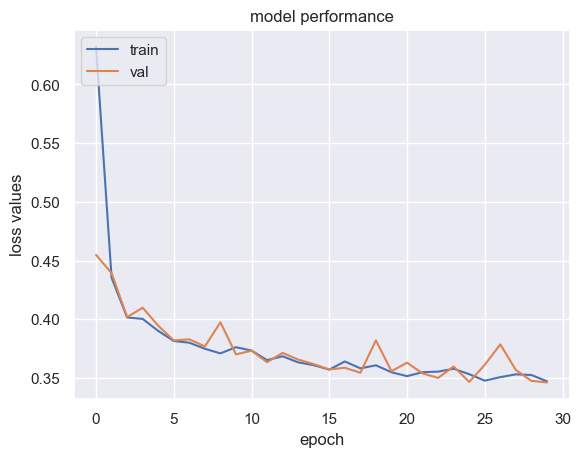

In [26]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

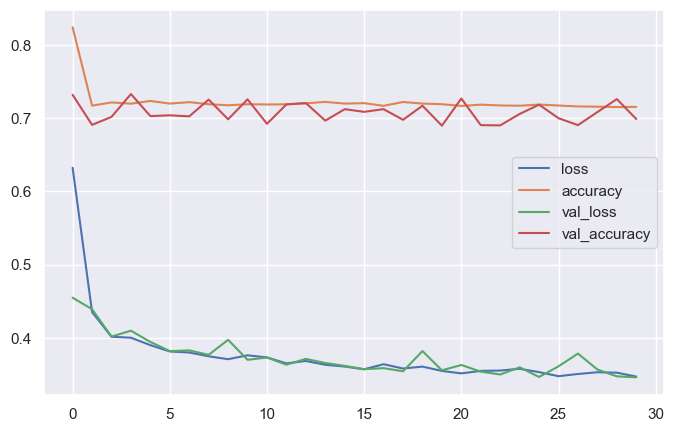

In [27]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8,5))
plt.show()

In [28]:
prediction = best_mlp_model.predict(X_test)

69/69 [==============================] - 0s 1ms/step


In [29]:
from sklearn import metrics

In [37]:
accuracy = metrics.accuracy_score(y_test, prediction)
#precision = metrics.precision_score(y_test, prediction, average='weighted')
#recall = metrics.recall_score(y_test, prediction, average='weighted')

print('Accuracy: ', accuracy)
#print('Precision: ', precision)
#print('Recall: ', recall)

Accuracy:  0.8431372549019608


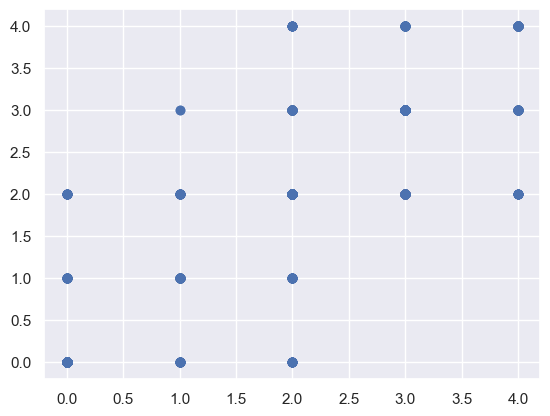

In [31]:
plt.scatter(y_test,prediction)

In [32]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test[:limit],color='green',label='Actual')
    plt.plot(prediction[:limit],color='red',label='Predicted')
    plt.grid(alpha=0.3)

    plt.title('Real x Predicted')
    plt.legend()
    plt.show()

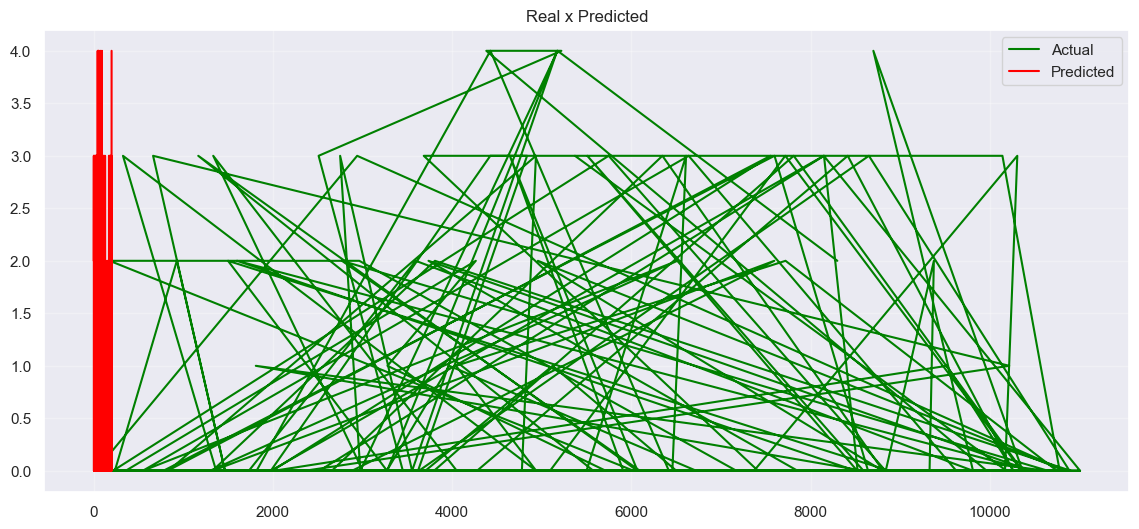

In [33]:
real_predicted_viz(200)

In [34]:
def gera_csv(predictions,name):
    row_ids = range(1, len(predictions) + 1)
    submission_df = pd.DataFrame({'RowId': row_ids, 'Result': predictions})
    replace_map = {'Result': {0:'None',1: 'Low', 2: 'Medium' ,3: 'High',4 : 'Very High' }}
    submission_df.replace(replace_map,inplace=True)
    submission_df.to_csv(name, index=False)

In [35]:
X_test_submission = data_dt_test.drop(['Injeção na rede (kWh)'],axis=1)
predictions_sub = best_mlp_model.predict(X_test_submission)
predictions_sub_2 = flat_list = [item for sublist in predictions_sub for item in sublist]
print(predictions_sub_2)

57/57 [==============================] - 0s 1ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [36]:
gera_csv(predictions_sub_2,'group20_an.csv')